# SPRINT 9 - ANÁLISIS DE SENTIMIENTOS Y TEXTOS


Gran parte de los datos que podemos encontrar para analizar utilizando el aprendizaje automático es texto libre. En este sprint veremos cómo analizarlo, limpiarlo y realizar análisis de sentimientos.


#### Exercici 1



Coge un texto en inglés que quieras y calcula la frecuencia de las palabras.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
nltk.download('punkt') #se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4') 
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon') 

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Seleccioné un texto sobre el cambio climático

In [4]:
text="""Climate change is an urgent issue that is affecting the world today. It is caused by human activities, such as burning fossil fuels and deforestation, which release greenhouse gases into the atmosphere. These gases trap heat and cause the planet to warm up, leading to a range of environmental problems.

One of the most visible effects of climate change is the melting of glaciers and ice caps, which is causing sea levels to rise. This can lead to flooding, which can damage infrastructure, homes, and businesses. In addition, rising sea levels can contaminate drinking water supplies, which can have serious health consequences.

Another effect of climate change is more frequent and intense natural disasters, such as hurricanes, droughts, and wildfires. These events can destroy homes and infrastructure, and can displace communities, leading to economic and social disruption.

Climate change is also having a profound effect on biodiversity. Many species are struggling to adapt to the rapid changes in temperature and rainfall patterns, and are facing extinction. This can have a cascading effect on ecosystems, as species play important roles in maintaining the balance of their habitats.

In addition to environmental impacts, climate change is also having economic and social consequences. For example, changes in temperature and rainfall patterns can affect agriculture, leading to reduced crop yields and higher food prices. This can have a disproportionate effect on low-income communities, who may struggle to afford basic necessities.

Addressing climate change requires a concerted effort from individuals, businesses, and governments around the world. This includes reducing greenhouse gas emissions, transitioning to renewable energy sources, and adopting more sustainable practices in agriculture, transportation, and industry.

There are many steps individuals can take to reduce their carbon footprint and help mitigate the effects of climate change. This includes reducing energy consumption in the home, using public transportation or electric vehicles, and supporting sustainable businesses and practices.

Governments can also play a critical role in addressing climate change. This includes setting emissions targets, implementing regulations to reduce greenhouse gas emissions, and investing in renewable energy infrastructure.

In conclusion, climate change is a complex and urgent issue that requires immediate action. It is affecting the planet in a range of ways, from rising sea levels to more frequent and intense natural disasters. Addressing climate change requires a global effort, and requires individuals, businesses, and governments to work together to reduce greenhouse gas emissions and adopt more sustainable practices."""

Procedemos a tokenizar el texto.

*¿Por qué lo hacemos?*

Como queremos analizar la frecuencia de las palabras del texto, primero tendrías que tokenizarlo en palabras individuales. Esto se hace dividiendo el texto en espacios en blanco, signos de puntuación, y eliminando cualquier caracter especial que no sea relevante para el análisis.

La tokenización es una tarea común en el procesamiento del lenguaje natural (NLP), ya que muchos algoritmos y modelos de aprendizaje automático requieren que los datos de texto se dividan en tokens para poder trabajar con ellos de manera efectiva.

Primero lo hacemos por frases:

In [5]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['Climate change is an urgent issue that is affecting the world today.', 'It is caused by human activities, such as burning fossil fuels and deforestation, which release greenhouse gases into the atmosphere.', 'These gases trap heat and cause the planet to warm up, leading to a range of environmental problems.', 'One of the most visible effects of climate change is the melting of glaciers and ice caps, which is causing sea levels to rise.', 'This can lead to flooding, which can damage infrastructure, homes, and businesses.', 'In addition, rising sea levels can contaminate drinking water supplies, which can have serious health consequences.', 'Another effect of climate change is more frequent and intense natural disasters, such as hurricanes, droughts, and wildfires.', 'These events can destroy homes and infrastructure, and can displace communities, leading to economic and social disruption.', 'Climate change is also having a profound effect on biodiversity.', 'Many species are struggli

Luego a cada una de éstas frases, las dividimos en palabras:

In [6]:
tokenized_word = word_tokenize(text)
print(tokenized_word)

['Climate', 'change', 'is', 'an', 'urgent', 'issue', 'that', 'is', 'affecting', 'the', 'world', 'today', '.', 'It', 'is', 'caused', 'by', 'human', 'activities', ',', 'such', 'as', 'burning', 'fossil', 'fuels', 'and', 'deforestation', ',', 'which', 'release', 'greenhouse', 'gases', 'into', 'the', 'atmosphere', '.', 'These', 'gases', 'trap', 'heat', 'and', 'cause', 'the', 'planet', 'to', 'warm', 'up', ',', 'leading', 'to', 'a', 'range', 'of', 'environmental', 'problems', '.', 'One', 'of', 'the', 'most', 'visible', 'effects', 'of', 'climate', 'change', 'is', 'the', 'melting', 'of', 'glaciers', 'and', 'ice', 'caps', ',', 'which', 'is', 'causing', 'sea', 'levels', 'to', 'rise', '.', 'This', 'can', 'lead', 'to', 'flooding', ',', 'which', 'can', 'damage', 'infrastructure', ',', 'homes', ',', 'and', 'businesses', '.', 'In', 'addition', ',', 'rising', 'sea', 'levels', 'can', 'contaminate', 'drinking', 'water', 'supplies', ',', 'which', 'can', 'have', 'serious', 'health', 'consequences', '.', 'A

Calculamos cual es la frecuencia de la palabras:

In [7]:
freqdist = FreqDist(tokenized_word)
print(freqdist)

<FreqDist with 196 samples and 460 outcomes>


In [8]:
freqdist.most_common(15)

[(',', 35),
 ('and', 26),
 ('.', 23),
 ('to', 16),
 ('the', 11),
 ('can', 11),
 ('change', 10),
 ('is', 10),
 ('a', 9),
 ('of', 8),
 ('climate', 8),
 ('in', 8),
 ('This', 6),
 ('which', 4),
 ('greenhouse', 4)]

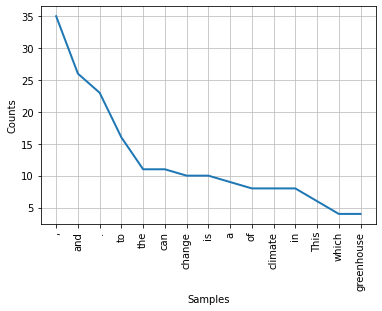

In [9]:
freqdist.plot(15, cumulative=False)
plt.show()

Cuando obtenemos las 15 palabras más frecuentes en el texto, podemos observar como realizar este filtro no es representativo para un análisis correcto ya que al no quitar comas, puntos y conectores normales en una redacción, aparecen entre las palabras y símbolos más recurrentes.

En el segundo punto del ejercicio, eliminaremos filtraremos éstas stopwords.

#### **EXERCICI 2**

Treu les stopwords i realitza stemming al teu conjunt de dades.

---




Las **stopwords** (palabras vacías o de parada) son palabras comunes que se eliminan del texto durante la tokenización porque generalmente no tienen un significado útil para el análisis de texto. Son palabras comunes que no aportan mucho valor semántico al texto y se utilizan principalmente para estructurar las oraciones.



In [10]:
stop_words = set(stopwords.words('english'))  # Definir las stopwords para el idioma inglés
filtered_tokens = [word for word in tokenized_word if not word.lower() in stop_words]  # Filtrar las stopwords

print(filtered_tokens)

['Climate', 'change', 'urgent', 'issue', 'affecting', 'world', 'today', '.', 'caused', 'human', 'activities', ',', 'burning', 'fossil', 'fuels', 'deforestation', ',', 'release', 'greenhouse', 'gases', 'atmosphere', '.', 'gases', 'trap', 'heat', 'cause', 'planet', 'warm', ',', 'leading', 'range', 'environmental', 'problems', '.', 'One', 'visible', 'effects', 'climate', 'change', 'melting', 'glaciers', 'ice', 'caps', ',', 'causing', 'sea', 'levels', 'rise', '.', 'lead', 'flooding', ',', 'damage', 'infrastructure', ',', 'homes', ',', 'businesses', '.', 'addition', ',', 'rising', 'sea', 'levels', 'contaminate', 'drinking', 'water', 'supplies', ',', 'serious', 'health', 'consequences', '.', 'Another', 'effect', 'climate', 'change', 'frequent', 'intense', 'natural', 'disasters', ',', 'hurricanes', ',', 'droughts', ',', 'wildfires', '.', 'events', 'destroy', 'homes', 'infrastructure', ',', 'displace', 'communities', ',', 'leading', 'economic', 'social', 'disruption', '.', 'Climate', 'change',

In [ ]:
len(filtered_tokens)

309

Realizamos una visualización de estos datos, por medio de una Word Cloud, es una herramienta resumen de gran utilidad por ser fácil de interpretar, con atractivo visual y concisa:

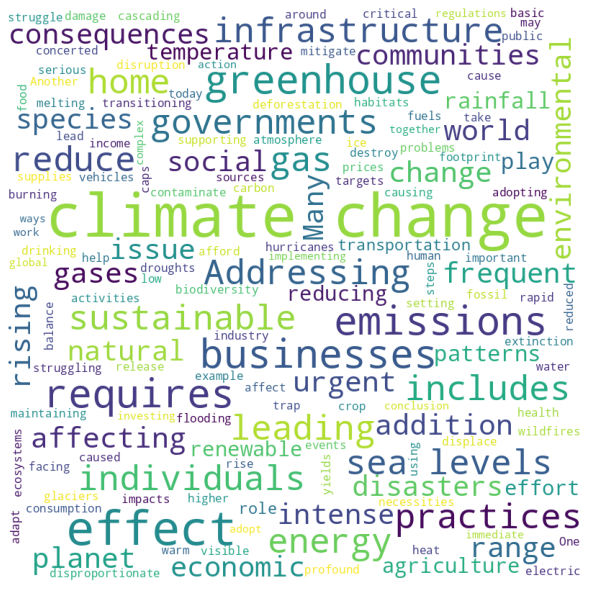

In [11]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(filtered_tokens))

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

El **stemming** es el proceso de reducir una palabra a su raíz o base, eliminando los sufijos y prefijos. Su objetivo es reducir las variantes de las palabras a una forma común para que sean más fáciles de analizar. Por ejemplo, al aplicar stemming, las palabras "corriendo", "correr", "correrá" y "correría" se reducirían a la raíz común "corr".

Existen diferentes algoritmos de stemming, algunos de los más populares son el algoritmo de Porter, el algoritmo de Snowball y el algoritmo de Lancaster. Cada algoritmo tiene sus propias reglas y criterios para reducir las palabras a su raíz, y su eficacia depende en gran medida del idioma y del contexto en el que se está aplicando el stemming.

En este caso escogeremos el de Porter:



In [12]:
stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(word) for word in filtered_tokens]

print(stemmed_words)

['climat', 'chang', 'urgent', 'issu', 'affect', 'world', 'today', '.', 'caus', 'human', 'activ', ',', 'burn', 'fossil', 'fuel', 'deforest', ',', 'releas', 'greenhous', 'gase', 'atmospher', '.', 'gase', 'trap', 'heat', 'caus', 'planet', 'warm', ',', 'lead', 'rang', 'environment', 'problem', '.', 'one', 'visibl', 'effect', 'climat', 'chang', 'melt', 'glacier', 'ice', 'cap', ',', 'caus', 'sea', 'level', 'rise', '.', 'lead', 'flood', ',', 'damag', 'infrastructur', ',', 'home', ',', 'busi', '.', 'addit', ',', 'rise', 'sea', 'level', 'contamin', 'drink', 'water', 'suppli', ',', 'seriou', 'health', 'consequ', '.', 'anoth', 'effect', 'climat', 'chang', 'frequent', 'intens', 'natur', 'disast', ',', 'hurrican', ',', 'drought', ',', 'wildfir', '.', 'event', 'destroy', 'home', 'infrastructur', ',', 'displac', 'commun', ',', 'lead', 'econom', 'social', 'disrupt', '.', 'climat', 'chang', 'also', 'profound', 'effect', 'biodivers', '.', 'mani', 'speci', 'struggl', 'adapt', 'rapid', 'chang', 'temperatu

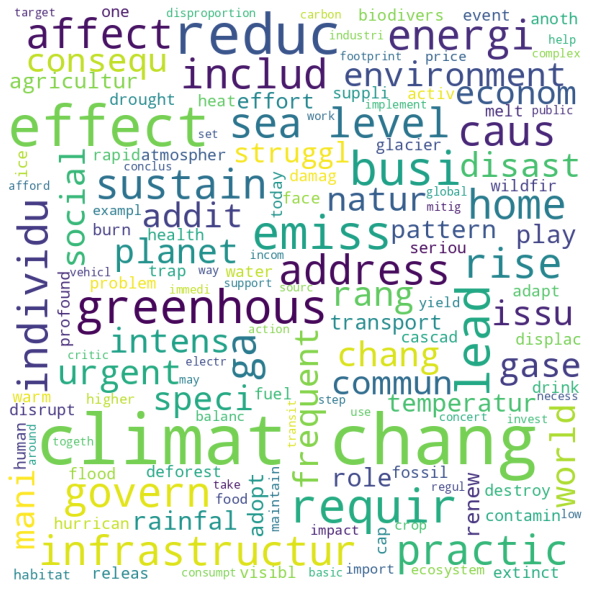

In [13]:
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(stemmed_words))

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Comparando las dos cloud words para cada uno de los pasos podemos comparar la diferencia entre ambos respecto a sus filtros.
Hay algo que es negativo en este método ya que corta las palabras y las deja incompletas, quitándole el sentido. Por ejemplo: "reduc" en vez de "reduce", "chang" en vez de "change", etc.


####**EXERCICI 3** 

Realitza sentiment analysis al teu conjunt de dades

*¿Qué es un análisis de sentimientos?*

Un análisis de sentimientos es una técnica de procesamiento de lenguaje natural que se utiliza para identificar y extraer información subjetiva de un texto, como opiniones, actitudes, emociones y sentimientos expresados por un autor. El análisis de sentimientos se utiliza comúnmente en la minería de datos y en la investigación de mercado para comprender cómo los clientes y el público en general perciben una marca, producto o servicio.

Creamos una instancia del analizador de sentimientos. En este caso, usaremos el analizador de intensidad de sentimientos de Vader:

In [19]:
analyzer = SentimentIntensityAnalyzer()

sentiments = []
for token in filtered_tokens:
    sentiment = analyzer.polarity_scores(token)['compound']
    sentiments.append(sentiment)

sentiment

0.0

El sentimiento general del texto nos da un valor neutro de cero, por lo cual no está definido como bueno o malo, es cierto que teniendo una visión crítica del texto, podemos deducir que no está mal, ya que las palabras que son más recurrentes en el texto, no son características de algún sentimiento en particular.

Luego, con el fin de analizar un poco más los datos y poder obtener una visión general del texto, calculamos la media de la puntuación de sentimientos.

In [16]:
sentiment_mean = sum(sentiments) / len(sentiments)
sentiment_mean

-0.00044530744336569505

El valor nos vuelve a dar un valor neutral, a pesar que es negativo, no deja de ser un valor muy cerca de cero.


Utilizaremos analyzer.polarity_scores() que es una herramienta útil para analizar el sentimiento de un fragmento de texto y obtener información sobre la intensidad de la carga emocional del mismo

In [17]:
analyzer.polarity_scores(text)


{'neg': 0.07, 'neu': 0.851, 'pos': 0.079, 'compound': -0.3122}

En resumen, la salida indica que el texto tiene una carga emocional negativa del 7% y que la mayoría de las palabras en el texto son neutrales. La puntuación compuesta 'compoud' sugiere que el sentimiento general del texto es negativo, pero el valor de -0.3122 no es muy fuerte, lo que sugiere que el sentimiento del texto tampoco es extremadamente negativo.